## Observations and Insights 

#From the data we can make 3 observations...
#1 being that there is a slightly larger population of male mice presented compared to the female population.
#2 The larger the mouse tested the heavier the volume of tumor present in its body.
#3 Drug Capomulin has the greatest amount of timepoints and Ramicane comes in second with the second most timepoints.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint 
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_data
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(len(combined_data['Mouse ID']))
mouse_count = len(combined_data['Mouse ID'])

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates('Mouse ID')
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data)

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = combined_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
variance = combined_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
standard_dv = combined_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = combined_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_1 = pd.DataFrame({'Mean': mean, 
                          'Median': median,
                          'Variance': variance,
                          'Standard Deviation': standard_dv,
                          'Sem': sem,
                         })


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
#Alter the dataframe down to two columns
bar_summary = bar_data[["Drug Regimen", "Mouse ID"]]
bar_summary = bar_summary.set_index("Drug Regimen")

Text(0, 0.5, 'Timepoints')

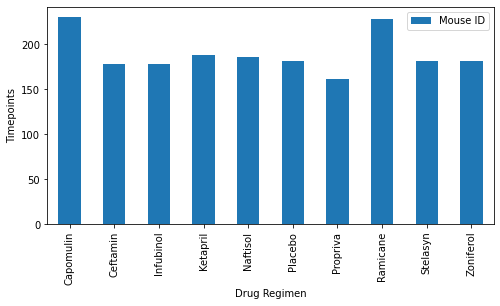

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_summary.plot(kind='bar', figsize=(8,4))
plt.ylabel('Timepoints')

In [10]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
group_gender = combined_data.groupby(["Mouse ID","Sex"])
group_gender
mouse_df = pd.DataFrame(group_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#Create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#Format the Percentage of Sex column and round to the nearest decimal
mouse_gender["Percentage of Sex"] = round(mouse_gender["Percentage of Sex"],2)

#GENDER DATAFRAME
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.8
Male,125,50.2


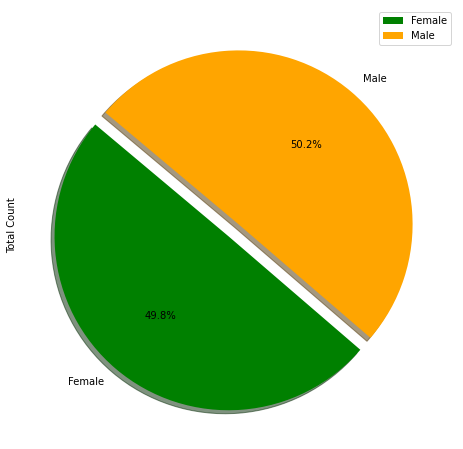

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['Green','Orange']
explode = (0.09, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,8), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

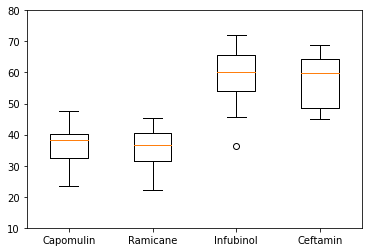

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Extract the top 4 regimenes from the data frame in order to perform IQR test on each

best_product = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_product = best_product.sort_values(["Timepoint"], ascending=True)
best_product
best_product_data = best_product[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_product_data 

# Start by getting the last (greatest) timepoint for each mouse
best_product_sorted = best_product_data.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
best_product_sorted.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_products = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_data = best_product_sorted.reset_index()
tumor_lists = final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_data = pd.DataFrame(tumor_lists)
tumor_list_data = tumor_list_data.reindex(top_products)
vol_tumor = [vol for vol in tumor_list_data['Tumor Volume (mm3)']]
plt.boxplot(vol_tumor, labels=top_products)
plt.ylim(10, 80)
plt.show()

In [52]:
sorted_df = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()
capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()
capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


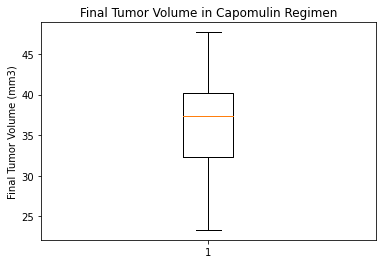

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


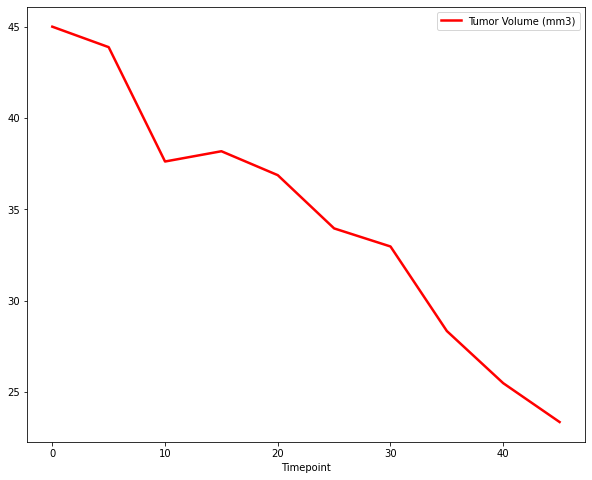

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_data_df = capomulin_data_df.reset_index()
capomulin_data_df.head()

# Grab data from one mouse
capo_mouse_data = capomulin_data_df.loc[capomulin_data_df["Mouse ID"] == "s185"]
capo_mouse_data

#Arrange data into two columns
capo_mouse_data = capo_mouse_data.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse_data = capo_mouse_data.reset_index(drop=True)
capo_mouse_data.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data_df.head()

#Arrange data into 3 columns
weight_df = capomulin_data_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

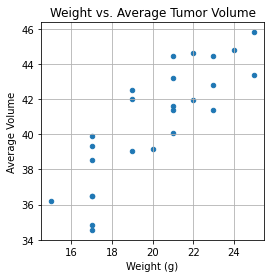

In [60]:
# Get the average tumor volume for each mouse under the use of Capomulin
avg_capo_information = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo_information.head()
#Rename "Tumor Volume (mm3)" column to "Average Volume"
avg_capo_information = avg_capo_information.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo_information.head()
#Creating the scatter plot of mouse wight compared to the average tumor volume for Capomulin
avg_capo_information.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo_information.iloc[:,0]
avg_tumor_volume = avg_capo_information.iloc[:,1]
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'

## Correlation and Regression

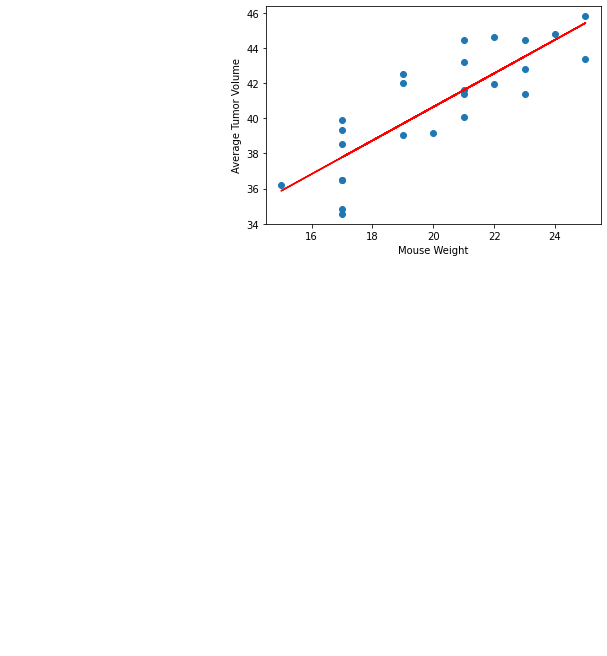

In [63]:
# import linregress
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo_information["Weight (g)"]
y_values = avg_capo_information["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation_data = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()